<a href="https://colab.research.google.com/github/rafid29/-Data-Driven-Green-Logistics-Strategies/blob/main/Building_a_Sustainable_Future_Data_Driven_Green_Logistics_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("shipping_data_sekolah_beta_20230918.csv")
df.head()

,order_date,order_uuid,warehouse_uuid,product_uuid,user_uuid,quantity,warehouse_x,warehouse_y,destination_x,destination_y
0,2021-01-01,1565923709910131312,WH-E,P-3,-3678567544766536269,10,207.23,205.48,252.01,640.27
1,2021-01-01,-228963390946970329,WH-E,P-3,1923029793316908270,10,207.23,205.48,327.40,401.13
2,2021-01-01,-1517799109336534877,WH-E,P-3,7032150002054910104,3,207.23,205.48,221.98,361.46
3,2021-01-01,6416392160279864176,WH-E,P-3,5619219112738892291,10,207.23,205.48,385.80,336.54
4,2021-01-01,-3989727987270664679,WH-E,P-3,5189336706879218811,10,207.23,205.48,324.38,229.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36586 entries, 0 to 36585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_date      36586 non-null  object 
 1   order_uuid      36586 non-null  int64  
 2   warehouse_uuid  36586 non-null  object 
 3   product_uuid    36586 non-null  object 
 4   user_uuid       36586 non-null  int64  
 5   quantity        36586 non-null  int64  
 6   warehouse_x     36586 non-null  float64
 7   warehouse_y     36586 non-null  float64
 8   destination_x   36586 non-null  float64
 9   destination_y   36586 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.8+ MB


In [19]:
#karena order_date typedata masih oject, maka ubah ke typedata datetime
df['order_date']=pd.to_datetime(df['order_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36586 entries, 0 to 36585
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_date      36586 non-null  datetime64[ns]
 1   order_uuid      36586 non-null  int64         
 2   warehouse_uuid  36586 non-null  object        
 3   product_uuid    36586 non-null  object        
 4   user_uuid       36586 non-null  int64         
 5   quantity        36586 non-null  int64         
 6   warehouse_x     36586 non-null  float64       
 7   warehouse_y     36586 non-null  float64       
 8   destination_x   36586 non-null  float64       
 9   destination_y   36586 non-null  float64       
 10  distance        36586 non-null  float64       
 11  new_distance    36586 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 3.3+ MB


In [11]:
# Fungsi untuk menghitung jarak Euclidean
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Menghitung jarak pengiriman saat ini
df['distance'] = df.apply(lambda row: calculate_distance(row['warehouse_x'], row['warehouse_y'], row['destination_x'], row['destination_y']), axis=1)

# Melihat beberapa hasil perhitungan jarak
df[['order_uuid', 'warehouse_x', 'warehouse_y', 'destination_x', 'destination_y', 'distance']].head()


,order_uuid,warehouse_x,warehouse_y,destination_x,destination_y,distance
0,1565923709910131312,207.23,205.48,252.01,640.27,437.089914
1,-228963390946970329,207.23,205.48,327.40,401.13,229.607821
2,-1517799109336534877,207.23,205.48,221.98,361.46,156.675853
3,6416392160279864176,207.23,205.48,385.80,336.54,221.503879
4,-3989727987270664679,207.23,205.48,324.38,229.61,119.609278


In [9]:
# Menghitung total kuantitas untuk setiap gudang
total_quantity = df.groupby(['warehouse_uuid'])['quantity'].sum().reset_index()

# Menggabungkan koordinat gudang
warehouses = df[['warehouse_uuid', 'warehouse_x', 'warehouse_y']].drop_duplicates()

# Menggabungkan dengan total kuantitas
warehouse_data = pd.merge(warehouses, total_quantity, on='warehouse_uuid')

# Menghitung koordinat X optimal
X_c = (warehouse_data['warehouse_x'] * warehouse_data['quantity']).sum() / warehouse_data['quantity'].sum()

# Menghitung koordinat Y optimal
Y_c = (warehouse_data['warehouse_y'] * warehouse_data['quantity']).sum() / warehouse_data['quantity'].sum()

print(f"Koordinat X optimal: {X_c}")
print(f"Koordinat Y optimal: {Y_c}")


Koordinat X optimal: 291.16713816267776
Koordinat Y optimal: 391.8253966615291


In [15]:
# Fungsi untuk menghitung jarak baru dengan lokasi gudang optimal
def calculate_new_distance(destination_x, destination_y, X_c, Y_c):
    return np.sqrt((destination_x - X_c)**2 + (destination_y - Y_c)**2)

# Menghitung jarak baru
df['new_distance'] = df.apply(lambda row: calculate_new_distance(row['destination_x'], row['destination_y'], X_c, Y_c), axis=1)

# Melihat perbandingan jarak lama dan baru
df[['order_uuid', 'distance', 'new_distance']].head()



,order_uuid,distance,new_distance
0,1565923709910131312,437.089914,251.511436
1,-228963390946970329,229.607821,37.408501
2,-1517799109336534877,156.675853,75.557378
3,6416392160279864176,221.503879,109.598602
4,-3989727987270664679,119.609278,165.580582


In [14]:
# Menghitung total jarak pengiriman saat ini dan yang baru
total_current_distance = df['distance'].sum()
total_new_distance = df['new_distance'].sum()

print(f"Total jarak pengiriman saat ini: {total_current_distance}")
print(f"Total jarak pengiriman baru: {total_new_distance}")

Total jarak pengiriman saat ini: 5839000.376456421
Total jarak pengiriman baru: 6566409.329958978


In [21]:
# Menambahkan kolom 'Month' untuk memudahkan pengelompokan
df['Month'] = df['order_date'].dt.to_period('M')

# Mengelompokkan data berdasarkan bulan, gudang, dan produk
monthly_data = df.groupby(['Month', 'warehouse_uuid', 'product_uuid'])['quantity'].sum().reset_index()

monthly_data.head()

,Month,warehouse_uuid,product_uuid,quantity
0,2021-01,WH-A,P-3,146
1,2021-01,WH-C,P-2,1820
2,2021-01,WH-C,P-4,1
3,2021-01,WH-D,P-2,170
4,2021-01,WH-D,P-3,335


     Month warehouse_uuid product_uuid  quantity
0  2021-01           WH-A          P-3       146
1  2021-01           WH-C          P-2      1820
2  2021-01           WH-C          P-4         1
3  2021-01           WH-D          P-2       170
4  2021-01           WH-D          P-3       335


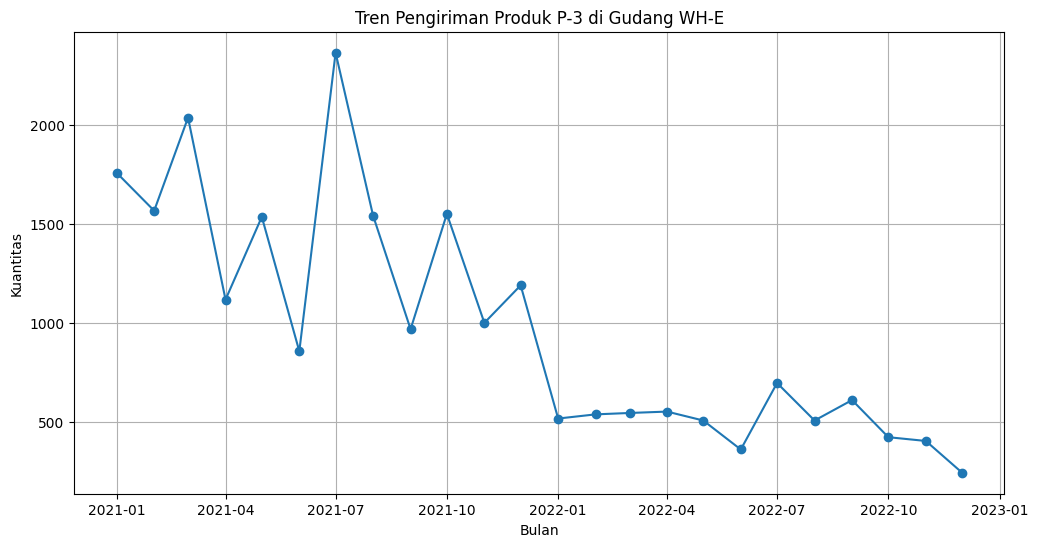

Jumlah data: 24


In [49]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan bulan, gudang, dan produk
monthly_data = df.groupby(['Month', 'warehouse_uuid', 'product_uuid'])['quantity'].sum().reset_index()

# Menampilkan beberapa baris pertama dari data yang sudah dikelompokkan
print(monthly_data.head())

# Memilih salah satu kombinasi gudang dan produk yang ada dalam data
warehouse_uuid = df['warehouse_uuid'].unique()[0]
product_uuid = df['product_uuid'].unique()[0]

# Mengelompokkan data untuk satu produk dan satu gudang sebagai contoh
product_data = monthly_data[(monthly_data['warehouse_uuid'] == warehouse_uuid) & (monthly_data['product_uuid'] == product_uuid)]

# Membuat plot tren pengiriman
plt.figure(figsize=(12, 6))
plt.plot(product_data['Month'].dt.to_timestamp(), product_data['quantity'], marker='o')
plt.title(f'Tren Pengiriman Produk {product_uuid} di Gudang {warehouse_uuid}')
plt.xlabel('Bulan')
plt.ylabel('Kuantitas')
plt.grid(True)
plt.show()

product_data.set_index('Month', inplace=True)
# Memeriksa jumlah data
print(f"Jumlah data: {len(product_data)}")

In [51]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

# Mengelompokkan data untuk setiap gudang dan produk
warehouses = df['warehouse_uuid'].unique()
products = df['product_uuid'].unique()
# Misalkan lead time adalah 1 bulan dan tingkat layanan yang diinginkan adalah 95%
lead_time = 1
service_level = 0.95
z_score = norm.ppf(service_level)

# Dictionary untuk menyimpan stok optimal untuk setiap gudang dan produk
optimal_stock_dict = {}

for warehouse in warehouses:
    for product in products:
        # Mengelompokkan data untuk satu produk dan satu gudang sebagai contoh
        product_data = monthly_data[(monthly_data['warehouse_uuid'] == warehouse) & (monthly_data['product_uuid'] == product)]

        # Jika tidak ada data historis untuk kombinasi gudang dan produk ini, lewati
        if product_data.empty:
            continue

        # Mengatur indeks untuk data
        product_data.set_index('Month', inplace=True)

        # Menggunakan model ARIMA untuk prediksi
        try:
            model = ARIMA(product_data['quantity'], order=(1, 1, 1)).fit()
            forecast = model.forecast(steps=1)
            predicted_demand = forecast[0]
        except:
            predicted_demand = product_data['quantity'].mean()

        # Menghitung variabilitas permintaan
        demand_variability = product_data['quantity'].std()

        # Menghitung safety stock (stok pengaman)
        safety_stock = z_score * demand_variability * (lead_time ** 0.5)

        # Menghitung stok optimal
        optimal_stock = predicted_demand + safety_stock

        # Menyimpan hasil ke dictionary
        optimal_stock_dict[(warehouse, product)] = optimal_stock

        print(f"Stok optimal untuk Produk {product} di Gudang {warehouse} pada Januari 2023: {optimal_stock}")


Stok optimal untuk Produk P-3 di Gudang WH-E pada Januari 2023: 1359.053506520501
Stok optimal untuk Produk P-2 di Gudang WH-E pada Januari 2023: 1720.4637048016082
Stok optimal untuk Produk P-1 di Gudang WH-E pada Januari 2023: 220.83270244199753
Stok optimal untuk Produk P-4 di Gudang WH-E pada Januari 2023: 238.26811187325717
Stok optimal untuk Produk P-3 di Gudang WH-C pada Januari 2023: 175.66766211404922


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Stok optimal untuk Produk P-2 di Gudang WH-C pada Januari 2023: 1539.7818636315592
Stok optimal untuk Produk P-1 di Gudang WH-C pada Januari 2023: 41.611363623284845
Stok optimal untuk Produk P-4 di Gudang WH-C pada Januari 2023: 38.58800001627219
Stok optimal untuk Produk P-3 di Gudang WH-D pada Januari 2023: 966.6616720088072


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Stok optimal untuk Produk P-2 di Gudang WH-D pada Januari 2023: 1379.317896196878
Stok optimal untuk Produk P-1 di Gudang WH-D pada Januari 2023: 284.0832300359464
Stok optimal untuk Produk P-4 di Gudang WH-D pada Januari 2023: 171.38877259816417
Stok optimal untuk Produk P-3 di Gudang WH-F pada Januari 2023: 706.1091898409563


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Stok optimal untuk Produk P-2 di Gudang WH-F pada Januari 2023: 1990.752822837399
Stok optimal untuk Produk P-1 di Gudang WH-F pada Januari 2023: 254.40695517937922
Stok optimal untuk Produk P-4 di Gudang WH-F pada Januari 2023: 147.85798341015925
Stok optimal untuk Produk P-3 di Gudang WH-A pada Januari 2023: 118.4616351398556
Stok optimal untuk Produk P-2 di Gudang WH-A pada Januari 2023: 88.15065149012945


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Stok optimal untuk Produk P-1 di Gudang WH-A pada Januari 2023: 62.88998366261275
Stok optimal untuk Produk P-4 di Gudang WH-A pada Januari 2023: 27.042936773357187
Stok optimal untuk Produk P-3 di Gudang WH-B pada Januari 2023: 39.070175948074045
Stok optimal untuk Produk P-2 di Gudang WH-B pada Januari 2023: 36.96287416042293
Stok optimal untuk Produk P-1 di Gudang WH-B pada Januari 2023: 1.0
Stok optimal untuk Produk P-4 di Gudang WH-B pada Januari 2023: 1.0


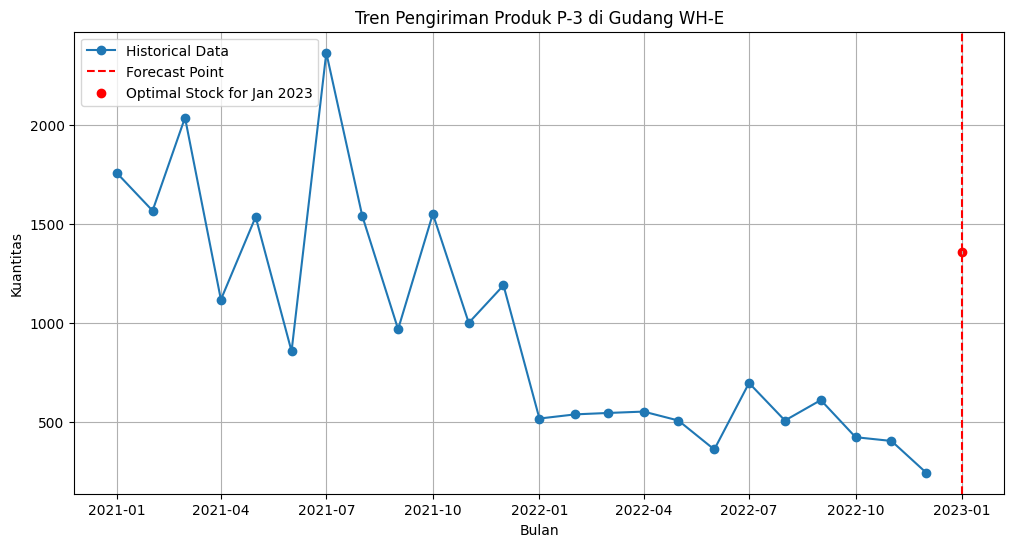

In [52]:
# Contoh visualisasi untuk satu gudang dan satu produk
warehouse_uuid = warehouses[0]
product_uuid = products[0]
product_data = monthly_data[(monthly_data['warehouse_uuid'] == warehouse_uuid) & (monthly_data['product_uuid'] == product_uuid)]
product_data.set_index('Month', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(product_data.index.to_timestamp(), product_data['quantity'], marker='o', label='Historical Data')
plt.axvline(x=pd.Timestamp('2023-01'), color='r', linestyle='--', label='Forecast Point')
plt.scatter(pd.Timestamp('2023-01'), optimal_stock_dict[(warehouse_uuid, product_uuid)], color='red', label='Optimal Stock for Jan 2023')
plt.title(f'Tren Pengiriman Produk {product_uuid} di Gudang {warehouse_uuid}')
plt.xlabel('Bulan')
plt.ylabel('Kuantitas')
plt.legend()
plt.grid(True)
plt.show()